In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy,BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics,preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns # data visualization


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
train_df = pd.read_csv('//kaggle//input//titanic//train.csv')
test_df = pd.read_csv('//kaggle//input//titanic//test.csv')


#train_df.dropna(inplace=True)
print(train_df.columns)



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
def scale(data):
    class_counts = data.groupby(['Pclass','Embarked']).size()
    most_freq = class_counts.groupby(level='Pclass').idxmax()
    for i,row in data.iterrows():
        if pd.isnull(row['Embarked']):
            class_ = row['Pclass']
            most_freq_Embarked = most_freq.loc[class_]
            data.at[i,'Embarked'] = most_freq_Embarked[1]

    nan_cols = data.columns[data.isna().any()].tolist()
    print(nan_cols)
    imputer = SimpleImputer(strategy = 'most_frequent')


    data[nan_cols] = imputer.fit_transform(data[nan_cols])
    return data


In [5]:
train_df = scale(train_df)
features = ['Pclass','Sex','SibSp','Parch','Embarked']
Y_train = train_df['Survived']
X_train = train_df[features]
X_test = test_df[features]
print(X_train)
print(X_test)

for column in X_train.columns:
    if column not in X_test.columns:
        X_test[column] = 0

for column in X_test.columns:
    if column not in X_train.columns:
        X_test.drop([column], axis=1, inplace=True)

# Encode categorical columns
#encoder = LabelEncoder()
#X_train['Sex'] = encoder.fit_transform(X_train['Sex'])
#X_train['Embarked'] = encoder.fit_transform(X_train['Embarked'])


# Perform one-hot encoding on the categorical features
#X_train_encoded = pd.get_dummies(X_train, columns=['Pclass', 'SibSp', 'Parch'])
X_train_encoded = pd.get_dummies(X_train, columns = features)

X_train = X_train_encoded
#X_train = train_df[features]
#input_dim = len(features) 

X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size = 0.2)
Y_train = np.array(Y_train, dtype=np.float32)
Y_val = np.array(Y_val, dtype=np.float32)


['Age', 'Cabin']
     Pclass     Sex  SibSp  Parch Embarked
0         3    male      1      0        S
1         1  female      1      0        C
2         3  female      0      0        S
3         1  female      1      0        S
4         3    male      0      0        S
..      ...     ...    ...    ...      ...
886       2    male      0      0        S
887       1  female      0      0        S
888       3  female      1      2        S
889       1    male      0      0        C
890       3    male      0      0        Q

[891 rows x 5 columns]
     Pclass     Sex  SibSp  Parch Embarked
0         3    male      0      0        Q
1         3  female      1      0        S
2         2    male      0      0        Q
3         3    male      0      0        S
4         3  female      1      1        S
..      ...     ...    ...    ...      ...
413       3    male      0      0        S
414       1  female      0      0        C
415       3    male      0      0        S
416       3  

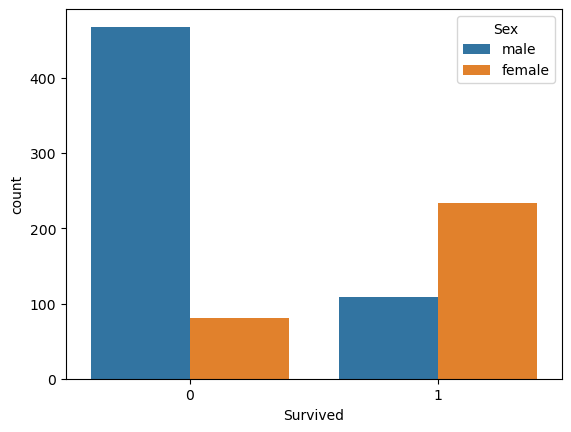

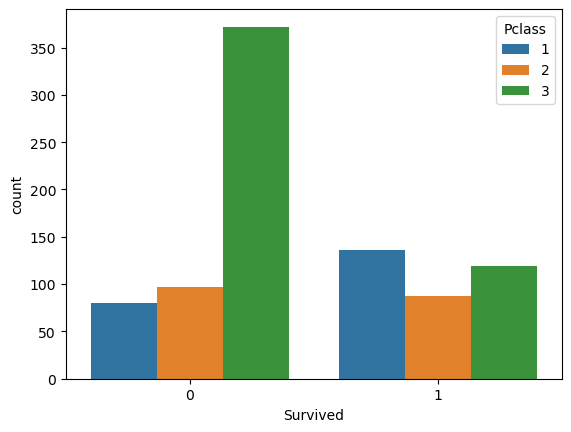

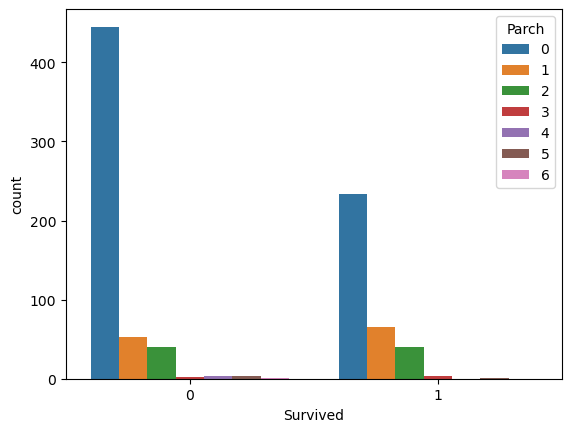

<Axes: xlabel='Survived', ylabel='count'>

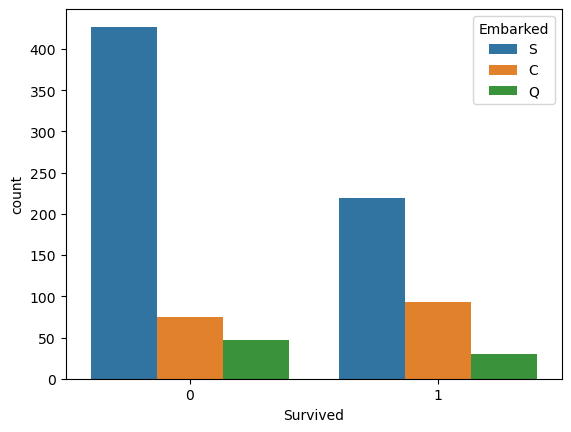

In [6]:
#data visualisation
#plt.figure(figsize=(8,6))
sns.countplot(x='Survived',hue = 'Sex', data= train_df)
plt.show()
sns.countplot(x='Survived',hue = 'Pclass', data= train_df)
plt.show()
sns.countplot(x='Survived',hue = 'Parch', data= train_df)
plt.show()
sns.countplot(x='Survived',hue = 'Embarked', data= train_df)

From this visualisation, we can see that there were certain features that indicated a higher chance of survival, these were being female and being in first class.

In [7]:
model = Sequential()
model.add(Dense(64,input_shape=(X_train.shape[1],),activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation = 'sigmoid'))

In [8]:
model.compile(optimizer = 'adam',loss = 'BinaryCrossentropy', metrics = ['accuracy',])

early_stop = EarlyStopping(patience= 5, monitor='val_loss')

In [9]:


history = model.fit(X_train,Y_train, batch_size= 32, epochs = 100, validation_data = (X_val,Y_val) )

Epoch 1/100
23/23 [==============================] - 1s 12ms/step - loss: 0.6733 - accuracy: 0.5534 - val_loss: 0.5855 - val_accuracy: 0.7318
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6023 - accuracy: 0.6643 - val_loss: 0.5300 - val_accuracy: 0.7933
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5583 - accuracy: 0.7317 - val_loss: 0.4864 - val_accuracy: 0.8045
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5224 - accuracy: 0.7626 - val_loss: 0.4594 - val_accuracy: 0.7989
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4961 - accuracy: 0.7823 - val_loss: 0.4412 - val_accuracy: 0.8045
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4906 - accuracy: 0.7809 - val_loss: 0.4351 - val_accuracy: 0.8045
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4656 - accuracy: 0.8020 - val_loss: 0.4348 - val_accuracy: 0.8156
Epoch 8/100


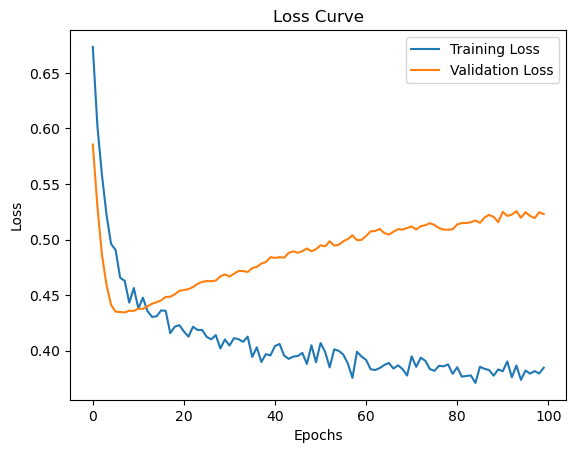

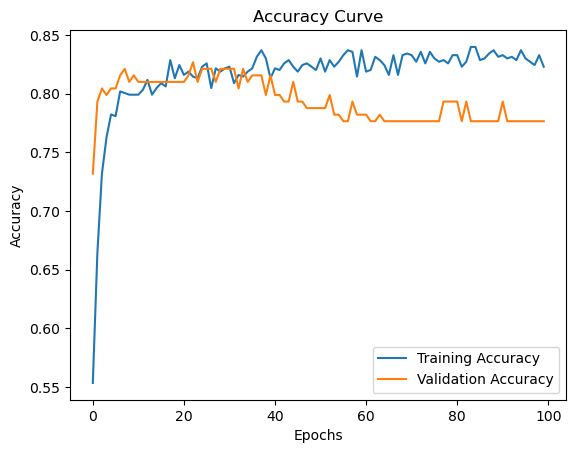

In [10]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:


X_test_encoded = pd.get_dummies(X_test, columns = features)

X_test = X_test_encoded
#X_train = train_df[features]
#input_dim = len(features) 



In [12]:
X_test.drop(['Parch_9'],axis=1,inplace=True)

predictions = model.predict(X_test)

14/14 [==============================] - 0s 1ms/step


In [13]:
print(predictions)

[[3.1840105e-02]
 [3.0856290e-01]
 [3.5844471e-02]
 [1.3690722e-01]
 [5.4962075e-01]
 [1.3690722e-01]
 [7.8856266e-01]
 [4.5568490e-01]
 [7.1621656e-01]
 [2.3581496e-02]
 [1.3690722e-01]
 [3.5230634e-01]
 [9.8478490e-01]
 [1.2016192e-01]
 [9.8478490e-01]
 [9.9194288e-01]
 [3.5844471e-02]
 [1.4982159e-01]
 [3.0856290e-01]
 [7.1621656e-01]
 [5.8420932e-01]
 [2.2242180e-01]
 [9.9115103e-01]
 [3.4296227e-01]
 [9.9977100e-01]
 [2.0730157e-01]
 [9.9699348e-01]
 [1.4982159e-01]
 [3.5230634e-01]
 [3.5081591e-02]
 [1.2016192e-01]
 [1.0975684e-02]
 [1.5855862e-01]
 [1.5855862e-01]
 [5.8420932e-01]
 [1.4982159e-01]
 [5.1939231e-01]
 [5.1939231e-01]
 [1.3690722e-01]
 [1.3690722e-01]
 [3.3789843e-01]
 [3.5230634e-01]
 [1.3690722e-01]
 [9.3840635e-01]
 [9.8478490e-01]
 [1.3690722e-01]
 [2.7632695e-01]
 [3.1840105e-02]
 [9.9858195e-01]
 [6.3557780e-01]
 [3.7716737e-01]
 [2.2494382e-01]
 [9.9708194e-01]
 [9.8578817e-01]
 [2.2494382e-01]
 [6.1764795e-04]
 [1.3690722e-01]
 [1.3690722e-01]
 [2.0730157e-0

In [14]:
predictions = np.round(predictions)
#print(predictions.ravel())
#print((test_df['PassengerId']))
submission = pd.DataFrame(({
        'PassengerId' : test_df['PassengerId'],
        'Survived': predictions.ravel()
        }))
submission['PassengerId'] = test_df['PassengerId']

filename= 'titanic predictions.csv'
submission.to_csv(filename, index=False)
